# Exploratory Data Analysis - Retail

# Task 3
Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’

# 1. Problem
As a business manager, try to find out the weak areas where you can work to make more profit.

# Answer 
After performing Exploratory Data Analysis on SampleSuperstore dataset it looks like the Furniture category has more sales than other categories but has the lowest profit margins. Furniture category marginal profit is the area where more work is required.

# 2. Problem
What all business problems you can derive by exploring the data?

# Answer
1. Why Furniture category have lowest profit? (Due to Second class Shipping mode.)
2. Segment has more sales? (Consumer has more sales than other.)

Task completed during Data Science & Analytics Internship @ The Sparks Foundation



By- Soumy Dubey

# Importing Libraries

In [98]:
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Uploading Data

In [100]:
file = r'E:\Python_Data_Visulisation\SampleSuperstore.csv'

data = pd.read_csv(file)

data

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [101]:
print('Shape of the data')
data.shape

Shape of the data


(9994, 13)

In [103]:
print('Data Describtion')
data.describe()

Data Describtion


,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


# Exploratory Data Analysis

Null Values

In [104]:
null_values = data.isnull()
null_values

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,False,False,False,False,False,False,False,False,False,False,False,False,False
9990,False,False,False,False,False,False,False,False,False,False,False,False,False
9991,False,False,False,False,False,False,False,False,False,False,False,False,False
9992,False,False,False,False,False,False,False,False,False,False,False,False,False


In [105]:
sum_null = null_values.sum()
print(sum_null, 'Zero Null Values')

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64 Zero Null Values


Unique Categories and sub_categories

In [106]:
Categories = data.Category.unique()
Categories

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [107]:
sub_categories = data['Sub-Category'].unique()
sub_categories

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

# Sales Analysis for Categories and Sub-Categories

In [108]:
# 3-Categories = 'Furniture', 'Office Supplies', 'Technology' 

sale_category = data.groupby('Category').sum().reset_index()

sale_category['Sale%'] = (sale_category.Sales / sale_category.sum())* 100

sale_category['Profit%'] = (sale_category.Profit / sale_category.Profit.sum()) * 100

display(sale_category)

,Category,Postal Code,Sales,Quantity,Discount,Profit,Sale%,Profit%
0,Furniture,118196026,741999.7953,8028,368.89,18451.2728,NaN,6.442551
1,Office Supplies,330772872,719047.0320,22906,947.80,122490.8008,NaN,42.769579
2,Technology,102603754,836154.0330,6939,244.40,145454.9481,NaN,50.787870


Text(0.5, 1.0, 'Sales by Categories')

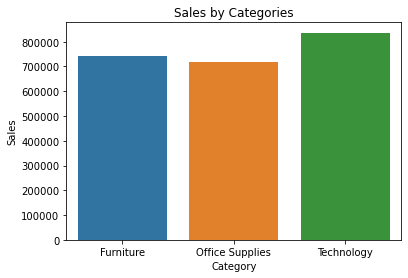

In [109]:
sns.barplot(x = sale_category.Category,y = sale_category.Sales).set_title('Sales by Categories')

Text(0.5, 1.0, 'Profit by Categories')

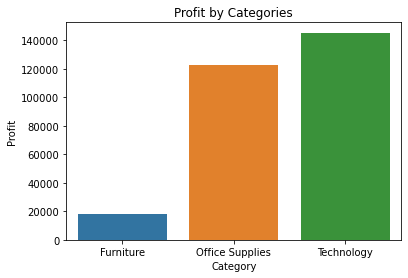

In [110]:
sns.barplot(x = sale_category.Category,y = sale_category.Profit).set_title('Profit by Categories')

In [111]:
# 10 Sub-Cetgory = 'Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage','Furnishings', 'Art', 'Phones', 'Binders', 
                  #'Appliances', 'Paper','Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines','Copiers'

sale_sub = data.groupby('Sub-Category').sum().sort_values(ascending = False, by = 'Sales').reset_index()

sale_sub['Sales%'] = (sale_sub.Sales / sale_category.Sales.sum()) * 100
sale_sub['Profit%'] = (sale_sub.Profit / sale_category.Profit.sum()) * 100
sale_sub.head()

,Sub-Category,Postal Code,Sales,Quantity,Discount,Profit,Sales%,Profit%
0,Phones,47897175,330007.054,3289,137.40,44515.7306,14.365616,15.543364
1,Chairs,34936229,328449.103,2356,105.00,26590.1663,14.297796,9.284372
2,Storage,46248720,223843.608,3158,63.20,21278.8264,9.744190,7.429835
3,Tables,18607828,206965.532,1241,83.35,-17725.4811,9.009466,-6.189129
4,Binders,83626398,203412.733,5974,567.00,30221.7633,8.854808,10.552401


<AxesSubplot:xlabel='Sub-Category', ylabel='Sales'>

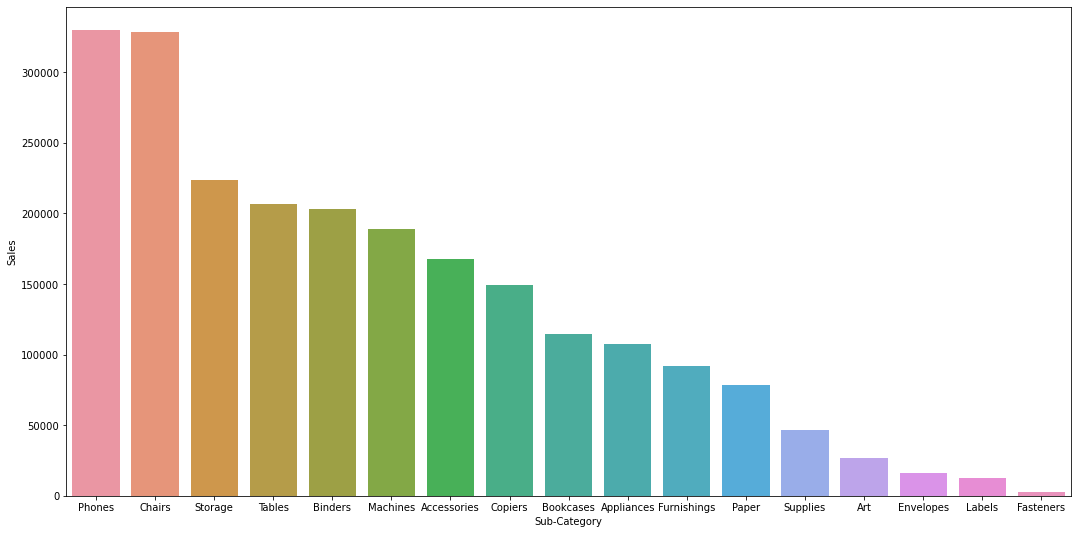

In [112]:
plt.figure(figsize = (18,9))
sns.barplot(x = 'Sub-Category',y = 'Sales', data = sale_sub)

In [121]:
# Profit by Sub-categories

profit_subcategory = sale_sub.sort_values(ascending = False, by = 'Profit').reset_index(drop = True)
profit_subcategory

,Sub-Category,Postal Code,Sales,Quantity,Discount,Profit,Sales%,Profit%
0,Copiers,3873477,149528.0300,234,11.00,55617.8249,6.509140,19.419834
1,Phones,47897175,330007.0540,3289,137.40,44515.7306,14.365616,15.543364
2,Accessories,44468434,167380.3180,2976,60.80,41936.6357,7.286273,14.642832
3,Paper,76299221,78479.2060,5178,102.60,34053.5693,3.416297,11.890336
4,Binders,83626398,203412.7330,5974,567.00,30221.7633,8.854808,10.552401
5,Chairs,34936229,328449.1030,2356,105.00,26590.1663,14.297796,9.284372
6,Storage,46248720,223843.6080,3158,63.20,21278.8264,9.744190,7.429835
7,Appliances,25250538,107532.1610,1729,77.60,18138.0054,4.681008,6.333168
8,Furnishings,51880430,91705.1640,3563,132.40,13059.1436,3.992039,4.559804
9,Envelopes,13325731,16476.4020,906,20.40,6964.1767,0.717238,2.431651


<AxesSubplot:xlabel='Sub-Category', ylabel='Profit'>

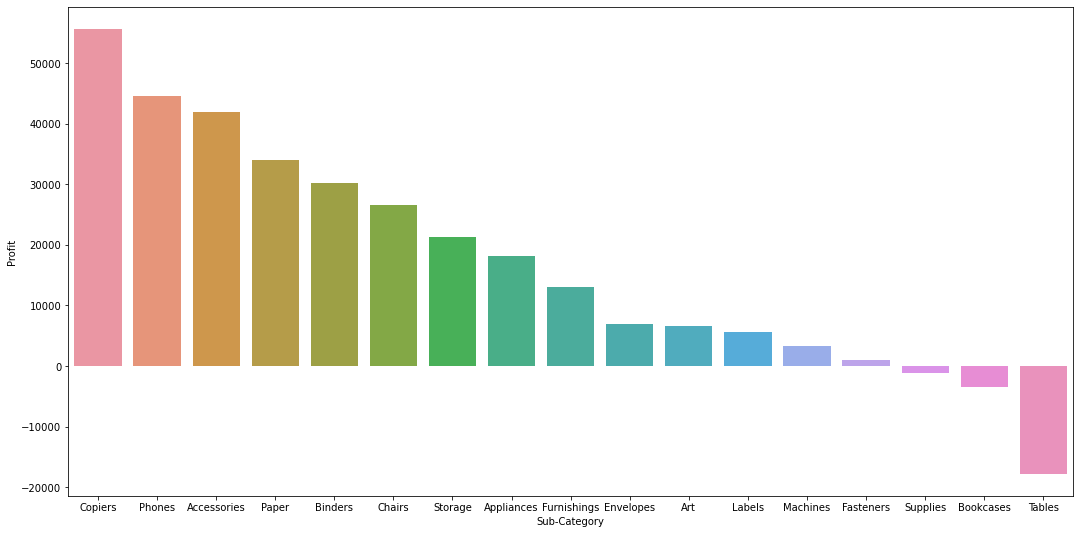

In [122]:
plt.figure(figsize = (18,9))
sns.barplot(x  = 'Sub-Category', y = 'Profit', data = profit_subcategory)

In [123]:
sale_segment = data.groupby('Segment').sum().reset_index()
sale_segment['Sales%'] = (sale_segment.Sales / sale_category.Sales.sum()) * 100
sale_segment['Profit%'] = (sale_segment.Profit / sale_category.Profit.sum()) * 100
sale_segment

,Segment,Postal Code,Sales,Quantity,Discount,Profit,Sales%,Profit%
0,Consumer,288878609,1.161401e+06,19521,820.91,134119.2092,50.557240,46.829820
1,Corporate,164536330,7.061464e+05,11608,477.85,91979.1340,30.739426,32.115953
2,Home Office,98157713,4.296531e+05,6744,262.33,60298.6785,18.703334,21.054227


Text(0.5, 1.0, 'Sales By Segment')

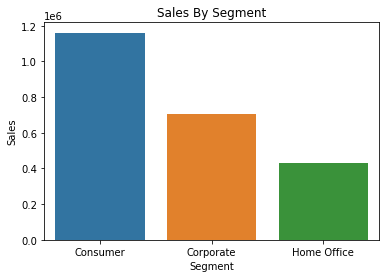

In [124]:
sns.barplot(x = sale_segment.Segment,y = sale_segment.Sales).set_title('Sales By Segment')

Text(0.5, 1.0, 'Profit By Segment')

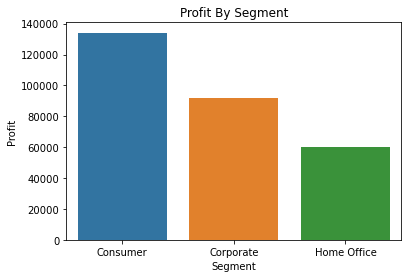

In [125]:
sns.barplot(x = sale_segment.Segment,y = sale_segment.Profit).set_title('Profit By Segment')

In [126]:
shipmode = data.groupby('Ship Mode').sum().reset_index()
shipmode['Sales%'] = (shipmode.Sales / sale_category.Sales.sum()) * 100
shipmode['Profit%'] = (shipmode.Profit / sale_category.Profit.sum()) * 100
shipmode

,Ship Mode,Postal Code,Sales,Quantity,Discount,Profit,Sales%,Profit%
0,First Class,84229511,3.514284e+05,5693,253.17,48969.8399,15.298115,17.098586
1,Same Day,31242093,1.283631e+05,1960,82.75,15891.7589,5.587806,5.548856
2,Second Class,108192588,4.591936e+05,7423,270.15,57446.6354,19.989265,20.058391
3,Standard Class,327908460,1.358216e+06,22797,955.02,164088.7875,59.124814,57.294167


Text(0.5, 1.0, 'Sales By Ship Mode')

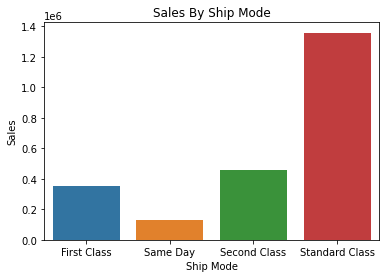

In [127]:
sns.barplot(x = shipmode['Ship Mode'],y = shipmode.Sales).set_title('Sales By Ship Mode')

Text(0.5, 1.0, 'Profit By Ship Mode')

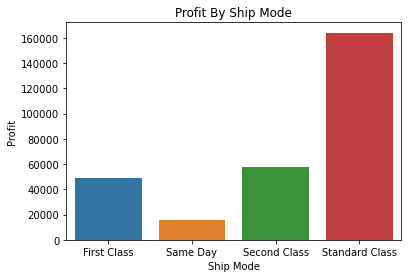

In [128]:
sns.barplot(x = shipmode['Ship Mode'],y = shipmode.Profit).set_title('Profit By Ship Mode')